In [13]:
import os
import glob
import pickle
import numpy as np
import pandas as pd
import cv2
import h5py
import tensorflow as tf
import keras
from keras.models import Model, model_from_json
from keras.optimizers import Adam
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.applications.xception import Xception
from keras.layers import Dense, Input, Flatten, Dropout, GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import KFold
from sklearn import metrics
import matplotlib
from matplotlib import pylab, mlab
from matplotlib import pyplot as plt
from IPython.core.pylabtools import figsize, getfigs
from pylab import savefig
#from numpy import *
%matplotlib inline
import matplotlib.image as mpimg
from sklearn.utils import shuffle

In [2]:
histories_paths = []
histories_paths.append( {'name': 'MNv2a_Cr3', 'filepath' : 
                         '../../output/mobilenet_v2_a/breeder_01/data_C/Run_03/for_plots/histories_Run_03.pckl'} )
histories_paths.append( {'name': 'MNv2a_Cr4', 'filepath' :
                         '../../output/mobilenet_v2_a/breeder_01/data_C/Run_04/for_plots/histories_Run_04.pckl'} )
histories_paths.append( {'name': 'MNv2a_Dr3', 'filepath' : 
                         '../../output/mobilenet_v2_a/breeder_01/data_D/Run_03/for_plots/histories_Run_03.pckl'} )
histories_paths.append( {'name': 'MNv2b_Cr1', 'filepath' : 
                         '../../output/mobilenet_v2_b/breeder_01/data_C/Run_01/for_plots/histories_Run_01.pckl'} )
histories_paths.append( {'name': 'MNv2b_Cr2', 'filepath' : 
                         '../../output/mobilenet_v2_b/breeder_01/data_C/Run_02/for_plots/histories_Run_02.pckl'} )
histories_paths.append( {'name': 'MNv2b_Dr1', 'filepath' : 
                         '../../output/mobilenet_v2_b/breeder_01/data_D/Run_01/for_plots/histories_Run_01.pckl'} )
histories_paths.append( {'name': 'MNv2c_Cr1', 'filepath' : 
                         '../../output/mobilenet_v2_c/breeder_01/data_C/Run_01/for_plots/histories_Run_01.pckl'} )
histories_paths.append( {'name': 'MNv2c_Dr1', 'filepath' : 
                         '../../output/mobilenet_v2_c/breeder_01/data_D/Run_01/for_plots/histories_Run_01.pckl'} )

In [26]:
def make_a_plot(output_index):
    file = open(histories_paths[output_index]['filepath'],'rb')
    histories = pickle.load(file) # histories for a single run
    file.close()

    print(f'histories keys = {histories[0].history.keys()}')
    print(f'len(histories) = {len(histories)}')
    # summarize history for accuracy
    plot_these = [['acc','val_acc','accuracy','Acc'], ['loss','val_loss','loss','Loss']]
    for plot_this in plot_these:
        for i in range(len(histories)):
            plt.plot(histories[i].history[plot_this[0]], linestyle='solid')
        for i in range(len(histories)):
            plt.plot(histories[i].history[plot_this[1]], linestyle='dashed')
        plt.title('{} model {}'.format(histories_paths[output_index]['name'], plot_this[2]))
        plt.ylabel(plot_this[2])
        plt.xlabel('epoch')
        if len(histories)==4:
            plt.legend(['train fold 1', 'train fold 2', 'train fold 3', 'train fold 4', 'validation f1', 'validation f2', 'validation f3', 'validation f4'], loc='lower right')
        if len(histories)==5:
            plt.legend(['train fold 1', 'train fold 2', 'train fold 3', 'train fold 4', 'train fold 5', 'validation f1', 'validation f2', 'validation f3', 'validation f4', 'validation f5'], loc='lower right')
        savefig("{}_{}.png".format(histories_paths[output_index]['name'],plot_this[3]), dpi=300, bbox_inches='tight')
        plt.show()

histories keys = dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'lr'])
len(histories) = 4


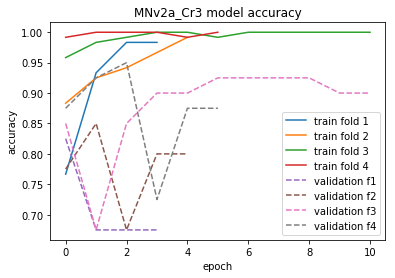

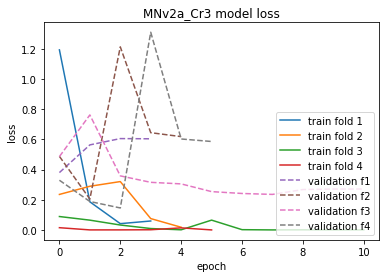

histories keys = dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'lr'])
len(histories) = 4


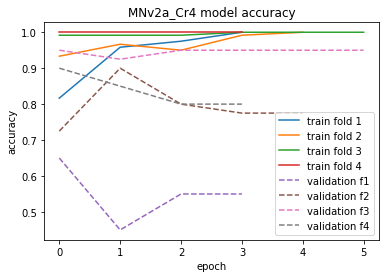

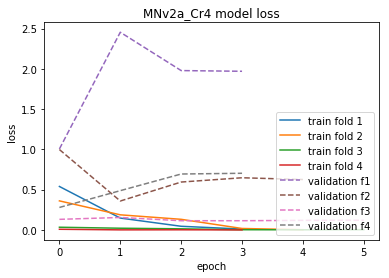

histories keys = dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'lr'])
len(histories) = 5


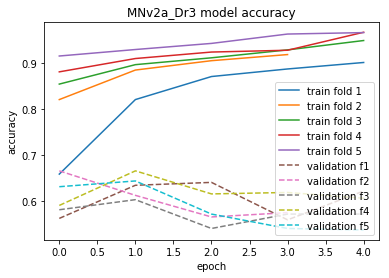

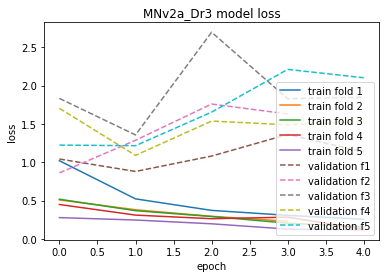

histories keys = dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'lr'])
len(histories) = 4


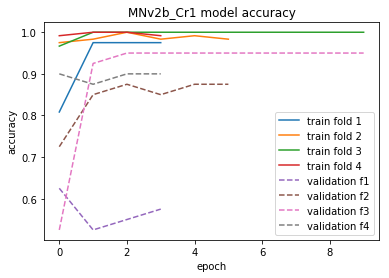

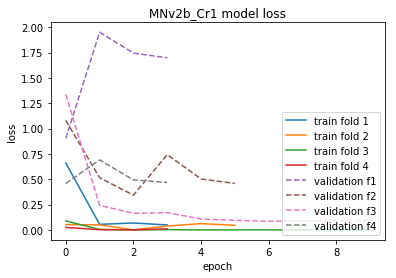

histories keys = dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'lr'])
len(histories) = 4


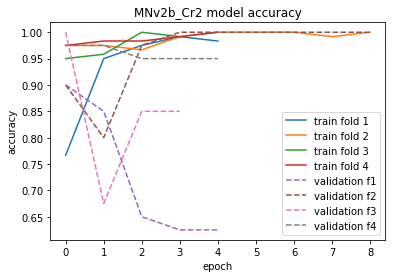

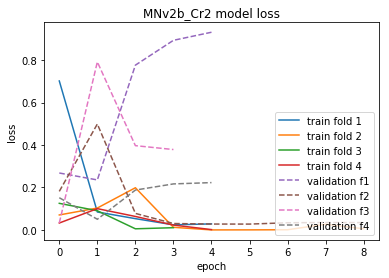

FileNotFoundError: [Errno 2] No such file or directory: '../../output/mobilenet_v2_b/breeder_01/data_D/Run_01/for_plots/histories_Run_01.pckl'

In [28]:
for run_index in range(len(histories_paths)):
    make_a_plot(run_index)

histories keys = dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'lr'])
len(histories) = 4


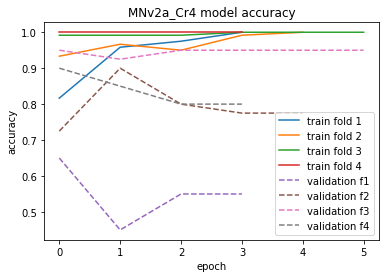

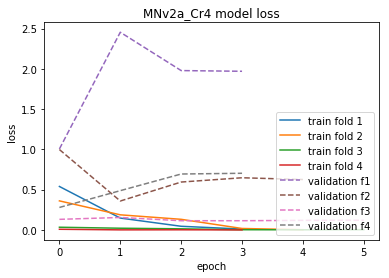

In [20]:
make_a_plot(1)

histories keys = dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'lr'])
len(histories) = 5


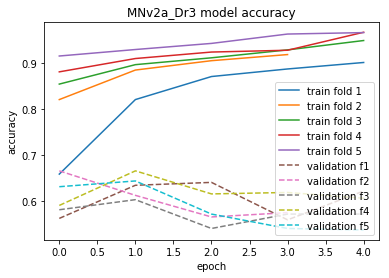

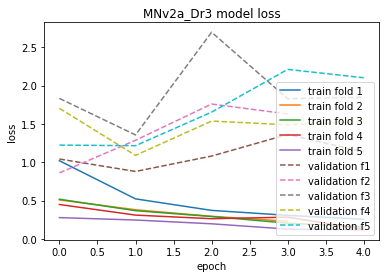

histories keys = dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'lr'])
len(histories) = 4


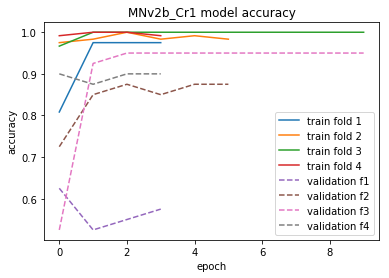

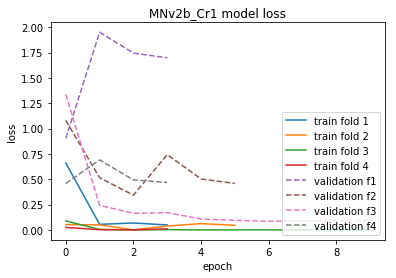

IndexError: list index out of range

In [21]:
for i in range(6):
    make_a_plot(i+2)

histories keys = dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'lr'])
len(histories) = 4


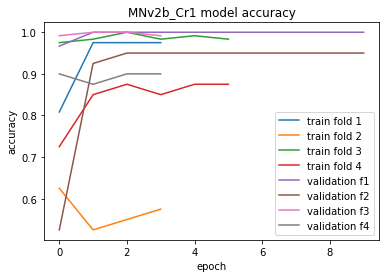

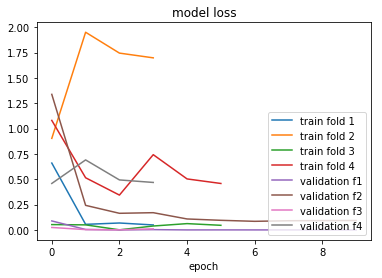

0

In [9]:
make_a_plot(3)

histories keys = dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'lr'])
len(histories) = 5


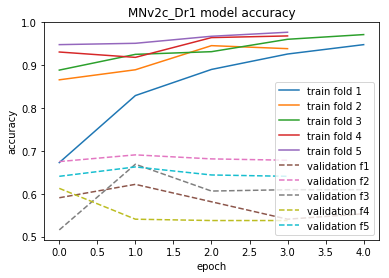

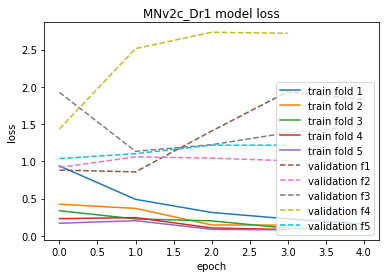

In [27]:
make_a_plot(7)

In [57]:
pathToHistoriesC3 = '../../output/mobilenet_v2_a/breeder_01/data_C/Run_03/for_plots/histories_Run_03.pckl'
with open(pathToHistoriesC3, 'rb') as f:
    historiesC3 = pickle.load(f)
    f.close()
print(historiesC3)
print(historiesC3[0].history.keys())

[<keras.callbacks.History object at 0x1abfdabda0>, <keras.callbacks.History object at 0x1abfd80c88>, <keras.callbacks.History object at 0x1abfdc9160>, <keras.callbacks.History object at 0x1abfdc90b8>]
dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'lr'])


In [5]:
fileC1 = open("../../output/mobilenet_v2_a/breeder_01/data_C/Run_01/for_plots/histories_Run_01.pckl",'rb')
historiesC1 = pickle.load(fileC1)
fileC1.close()
histories = list(historiesC1)
print(histories)

['.', '.', '/', 'o', 'u', 't', 'p', 'u', 't', '/', 'm', 'o', 'b', 'i', 'l', 'e', 'n', 'e', 't', '_', 'v', '2', '_', 'a', '/', 'b', 'r', 'e', 'e', 'd', 'e', 'r', '_', '0', '1', '/', 'd', 'a', 't', 'a', '_', 'C', '/', '/', 'R', 'u', 'n', '_', '0', '1', '/', 'f', 'o', 'r', '_', 'p', 'l', 'o', 't', 's', '/', 'h', 'i', 's', 't', '.', 'h', 'i', 's', 't', 'o', 'r', 'i', 'e', 's']


history keys = dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'lr'])
len(histories) = 4


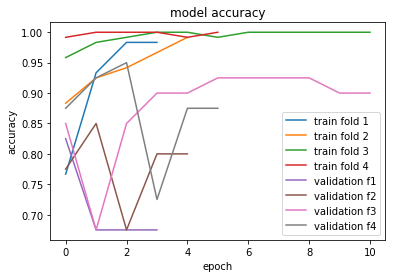

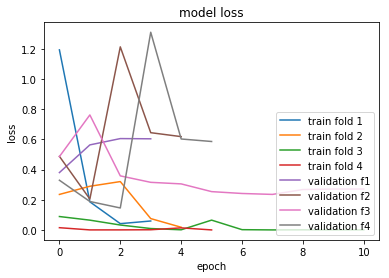

In [58]:
print(f'history keys = {historiesC3[0].history.keys()}')
print(f'len(histories) = {len(histories)}')
# summarize history for accuracy
plt.plot(historiesC3[0].history['acc'])
plt.plot(historiesC3[1].history['acc'])
plt.plot(historiesC3[2].history['acc'])
plt.plot(historiesC3[3].history['acc'])
plt.plot(historiesC3[0].history['val_acc'])
plt.plot(historiesC3[1].history['val_acc'])
plt.plot(historiesC3[2].history['val_acc'])
plt.plot(historiesC3[3].history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train fold 1', 'train fold 2', 'train fold 3', 'train fold 4', 'validation f1', 'validation f2', 'validation f3', 'validation f4'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(historiesC3[0].history['loss'])
plt.plot(historiesC3[1].history['loss'])
plt.plot(historiesC3[2].history['loss'])
plt.plot(historiesC3[3].history['loss'])
plt.plot(historiesC3[0].history['val_loss'])
plt.plot(historiesC3[1].history['val_loss'])
plt.plot(historiesC3[2].history['val_loss'])
plt.plot(historiesC3[3].history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train fold 1', 'train fold 2', 'train fold 3', 'train fold 4', 'validation f1', 'validation f2', 'validation f3', 'validation f4'], loc='lower right')
plt.show()

In [18]:
def mobilenet_v2_b(img_dim):
    # base network to be built around:
    base_model = MobileNetV2(input_shape=None,
                             #input_shape=img_dim,
                             alpha=1.0,
                             depth_multiplier=1,
                             include_top=False,
                             weights='imagenet',
                             input_tensor=None,
                             pooling=None
                             #classes=1000
                            )
    #for layer in base_model.layers:
    #    layer.trainable = False
    for layer in base_model.layers[:-3]: # All but ~last three layers
        layer.trainable = False          #  are no trainable.
    for layer in base_model.layers[-3:]: # ~Last three layers
        layer.trainable = True           #  are trainable.

    xi = Input(shape=img_dim)              # input tensor
    x  = BatchNormalization()(xi)          # next layer
    x  = base_model(x)                     # Each x on the right refers to
    x  = Dropout(0.5)(x)                   #  the previous x on the left.
    x  = Flatten()(x)                      #
    xo = Dense(1, activation='sigmoid')(x) # output tensor
    model = Model(inputs=xi, outputs=xo, name='mobilenet_v2_b')
    return model

In [35]:
model = mobilenet_v2_b((224,224,3))
print(model.name)
print(model.summary())

mobilenet_v2_b
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 224, 224, 3)       0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 224, 224, 3)       12        
_________________________________________________________________
mobilenetv2_1.00_224 (Model) multiple                  2257984   
_________________________________________________________________
dropout_5 (Dropout)          (None, 7, 7, 1280)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 62720)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 62721     
Total params: 2,320,717
Trainable params: 65,287
Non-trainable params: 2,255,430
______________________________________________

In [36]:
print(len(model.layers))
print(model.layers[2].name)
print(len(model.layers[2].layers))

6
mobilenetv2_1.00_224
155


In [37]:
def xception_a(img_dim):
    # base network to be built around:
    base_model = Xception(input_shape=None,
                          include_top=True,
                          weights='imagenet',
                          input_tensor=None,
                          pooling=None
                          #classes=1000
                         )

    for layer in base_model.layers:
        layer.trainable = False
    #for layer in base_model.layers[:-3]: # All but ~last three layers
    #    layer.trainable = False          #  are no trainable.
    #for layer in base_model.layers[-3:]: # ~Last three layers
    #    layer.trainable = True           #  are trainable.

    xi = Input(shape=img_dim)              # input tensor
    x  = BatchNormalization()(xi)          # next layer
    x  = base_model(x)                     # Each x on the right refers to
    x  = Dropout(0.5)(x)                   #  the previous x on the left.
    x  = Flatten()(x)                      #
    xo = Dense(1, activation='sigmoid')(x) # output tensor
    model = Model(inputs=xi, outputs=xo, name='xception_a')
    return model

In [42]:
modelx = xception_a((576, 576, 3))
print(modelx.name)
print(modelx.summary())

ValueError: Input 0 is incompatible with layer flatten_9: expected min_ndim=3, found ndim=2

In [ ]:
print(len(modelx.layers))
print(modelx.layers[2].name)
print(len(modelx.layers[2].layers))